### Iris dataset 
* 붓꽃의 품종(Setosa, Vesicolor, Virginica) 분류: 꽃잎의 폭/길이(petal length/width), 꽃받침의 폭/길이(Sepal length/width)
* feature_names, target_names(s : 0, ve: 1, vi:2)

### 사이킷런을 이용한 붓꽃 데이터 분류(Classification)
* 학습 --> 예측 --> 평가

### 주요 모델
* sklearn.datasets : load(소량데이터), fetch(대량데이터), make(확률분포를 사용하여 가상의 데이터)
* sklearn.model_selection
* sklearn.neighbors

### 학습/테스트 데이터 분리 - train_test_split()
* X_train, X_test, y_train, y_test : 주로 공통적으로 사용되는 변수 이름

## 1. 붓꽃 품종 분류

### (1) 데이터 적재

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("iris_dataset의 키: \n{}".format(iris_dataset.keys()))

iris_dataset의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# 데이터 셋의 설명을 출력
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris_dataset['DESCR'][:400] + '\n') # 데이터 셋 설명 앞부분만 출력

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
               



* 예측하려는 붓꽃 품종의 이름을 가지고 있는 key = target_names

In [7]:
format("타겟의 이름 : {}".format(iris_dataset['target_names']))

"타겟의 이름 : ['setosa' 'versicolor' 'virginica']"

* 특성을 설명하는 문자열 리스트 : feature_names

In [8]:
format("특성의 이름 : {}".format(iris_dataset['feature_names']))

"특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']"

* 실제 데이터(target, data) 중 data는 꽃잎의 길이와 폭, 꽃받임의 길이와 폭을 수치 값으로 가지고 있는 Numpy배열

In [9]:
print("data의 타입 : {}".format(type(iris_dataset['data'])))

data의 타입 : <class 'numpy.ndarray'>


In [10]:
print("data의 크기 : {}".format(iris_dataset['data'].shape))

data의 크기 : (150, 4)


- 이 배열은 150갸의 붓꽃 데이터를 가지고 있으며, 각 붓꽃마다 4개의 측정치를 가ㅣ고 있음
- 머신러닝에서 각 아이템은 샘플이라고 하고 속성은 특성이라고 부름
- 그러므로 data배열의 크기는 150*4가 됨
- 이는 scikit-learn의 스타일이면 항상 데이터가 이런 구조일 거라 가정하고 있음

In [11]:
print("data의 처음 다섯 행 : \n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 핸 : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


- 1열 : 꽃받침의 길이
- 2열 : 꽃받침의 폭
- 3열 : 꽃잎의 길이
- 4열 : 꽃잎의 폭

 * 이미지 삽입 = Markdown에 copy&paste <br>
 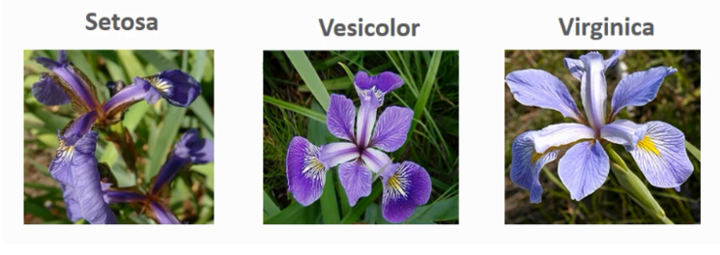

In [14]:
print("data의 타입 : {}".format(type(iris_dataset['target'])))

data의 타입 : <class 'numpy.ndarray'>


In [15]:
print("data의 크기 : {}".format(iris_dataset['target'].shape)) # 1차원 배열

data의 크기 : (150,)


In [16]:
print("타겟 : \n{}".format(iris_dataset['target']))
# 0 : setosa, 1 : versicolor, 2 : verginica 

타겟 : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### (2) 훈련데이터와 테스트 데이터
* 머신러닝 모델을 만들 때 사용하는 훈련데이터와 모델이 얼마나 잘 작동하는지 측정하는 테스트데이터로 나눈다
* scikit-learn은 데이터 셋을 섞어서 나눠주는 train_test_split함수 제공(훈련세트 : 75%)
* 데이터는 X, 레이블은 y로 나타낸다. 수학에서의 표준공식 f(x) = y를 따른 표기 방식
* 수학의 표기 방시을 따르되, 데이터는 2차원 배열(행렬)이므로 대문자 X를,타깃은 1차원(벡터)이므로 소문자 y를 사용

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)
# test_size = 로 훈련세트 사이즈 바꿀 수 있다! (기본값은 25%)

- train 데이터와, test 데이터로 나누기 전에 무작위로 섞어주지 않으면 순서대로 나누어 지기 때문에 y_test(테스트레이블)
  값이 모두 2가 나오게 된다
- 세 클래스 중 하나만 포함한 테스트 세트를 사용하면 모델이 얼마나 잘 일반화 되었는지 알 수 없다.
- 테스트 세트는 모든 클래스의 데이터를 포함하도록 잘 섞어야 한다.
- random_state = 0 은 이 함수를 여러번 실행해도 같은 랜덤값이 리턴 된다.

In [19]:
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

X_train 크기 : (112, 4)
y_train 크기 : (112,)


In [20]:
print("X_test 크기 : {}".format(X_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

X_test 크기 : (38, 4)
y_test 크기 : (38,)


### (3) 데이터 살펴보기
- 머신러닝 모델을 만들기 전에 머신러닝 없이도 풀 수 있는 문제가 아닌지, 혹은 필요한 정보가
  누락되어 있는지 데이터를 조사해 보는것이 좋다.
- 실제 데이터에는 일관성이 없거나 이상한 값이 들어가 있는 경우가 종종 있다.

In [21]:
# X_train 데이터를 사용해서 데이터프레임을 만든다
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

In [22]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

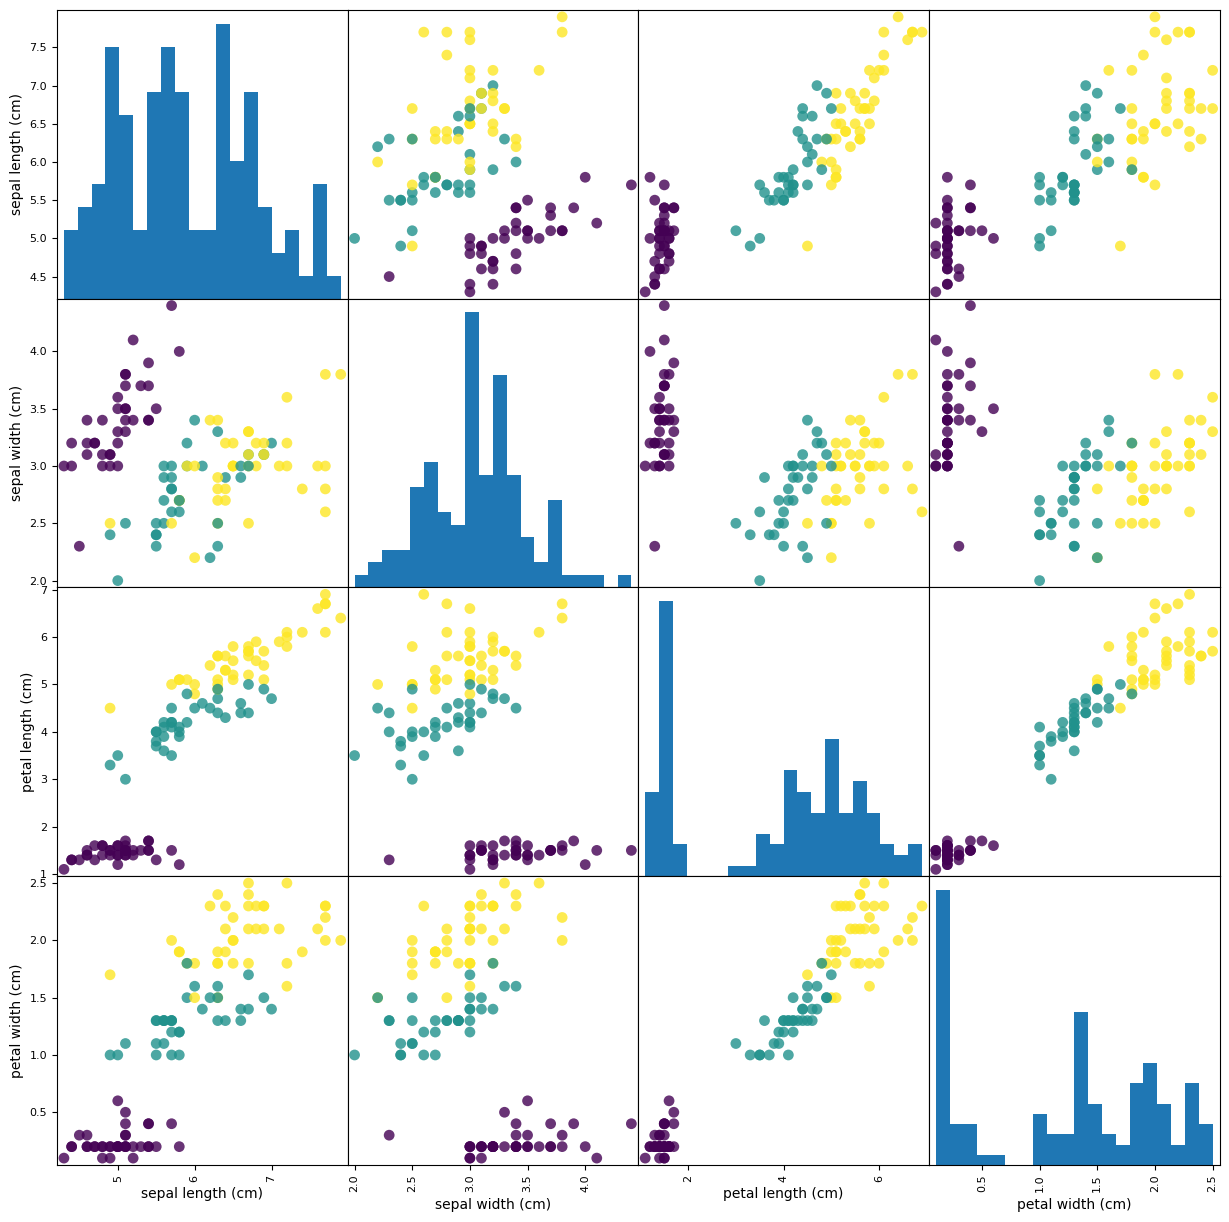

In [23]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize = (15,15), marker = 'o', hist_kwds = {'bins':20}, s = 60, alpha = .8)

- 세 클라스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분되어 있다. => classification ML기법을 사용하면 잘 구분될것이다

### (4) K-최근접 이웃(k-nearest neighbors,k-nn) 알고리즘을 이용한 머신러닝
- 훈련데이터를 통해 모델이 만들어지고 새로운 데이터가 들어오면 가까운 훈련 데이터 포인트를 찾아 분류한다
- scikit-learn의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 각각 구현되어 있다.
- k-최근접 이웃 분류 알고리즘은 neighbors 모듈 아래 KNeighborsClassifier 클래스에 구현되어 있다.
- 모델을 사용하기 위해 클ㄹ스로부터 객체를 만들고 paramiter를 설정한다.
- 가장 중요한 이웃의 개수를 1로 지정하고 모델을 만들어 보자


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### (5) 예측하기
- 위에서 만든 모델을 사용해서 새 데이터에 대한 예측을 만들 수 있다.
- 야생에서 꽃받침의 길이는 3cm, 폭은 4.2cm, 꽃입의 길이는 0.8cm, 폭은 0.4cm인 붓꽃을 찾았다고 가정하고
  이 붓꽃의 품종을 찾아보자
- 측정값은 numpy 배열로 만드는데, 하나의 붓꽃 샘플(1)에 4가지 특성(4)이 있으므로 1 by 4 배열을 만들어야 한다.
- 붓꽃 하나의 측정갑은 2차원 numpy 배열에 행으로 들어가므로, scikit-learn은 항상 데이터가 2차원 배열일 것으로 예상

In [27]:
X_new = np.array([[3, 4.2, 0.8, 0.4]])
print("X_new.shape : {}".format(X_new.shape))

X_new.shape : (1, 4)


In [28]:
prediction = knn.predict(X_new)
print("예측 : {}".format(prediction))

예측 : [0]


In [29]:
print("예측한 붓꽃의 이름 : {}".format(iris_dataset['target_names'][prediction]))

예측한 붓꽃의 이름 : ['setosa']


- 하나의 입력, 특성을 가진 값이 아니기 때문에 아래와 같이 벡터형태로 나타내면 에러가 난다.

In [31]:
X_new2 = np.array([3, 4.2, 0.8, 0.4])
print("새로운 데이터의 차원 : {}".format(X_new2.ndim))

새로운 데이터의 차원 : 1


In [34]:
X_new2_prediction = knn.predict(X_new2)
# ValueError: Expected 2D array, got 1D array instead:
# array=[3.  4.2 0.8 0.4].

ValueError: Expected 2D array, got 1D array instead:
array=[3.  4.2 0.8 0.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### (6) 모델 평가
* 앞에서 만든 테스트 셋을 가지고 현재 만든 학습모델이 잘 만들어 졌는지 확인해보자

In [35]:
# 만들어진 학습모델을 가지고 테스트 데이터의 붓꽃 품종을 예측한다
y_pred = knn.predict(X_test)

In [36]:
# 테스트 데이터의 예측값
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [37]:
# 예측 품종과 실제 품종이 같으면 true
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

정확도

In [39]:
print("정확도 : {:.4f}%".format(np.mean(y_pred == y_test)*100))
# :.4f는 소수점 4자리까지만 표기

정확도 : 97.3684%


knn 객체의 score 매서드 활용

In [40]:
print("정확도 : {:.4f}%".format(knn.score(X_test, y_test)*100))

정확도 : 97.3684%


sklearn.metrics의 accuracy_score사용

In [41]:
from sklearn import metrics

In [42]:
print("정확도 : {:.4f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

정확도 : 97.3684%
